In [ ]:
import pandas as pd
data = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")
# print(data.head())
print(data.isnull().sum())    # used to identify and handle missing values in the dataset
#data = data.dropna()         # To removes all rows that contain at least one missing value

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
X = data.drop('NObeyesdad', axis=1)  # Features
y = data['NObeyesdad']       # used to separate the dataset into features (X) and the target variable (y)


**DATA PREPROCESSING**

1. ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) #Label encode for taget variable

X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features

#Identify columns that contain boolean values
boolean_columns = X.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers
X[boolean_columns] = X[boolean_columns].astype(int)
print(X.head())
print(y)


    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Male  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0            0   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0            0   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0            1   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0            1   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0            1   

   family_history_with_overweight_yes  ...  CAEC_no  SMOKE_yes  SCC_yes  \
0                                   1  ...        0          0        0   
1                                   1  ...        0          1        1   
2                                   1  ...        0          0        0   
3                                   0  ...        0          0        0   
4                                   0  ...        0          0        0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0                0               0        1            0            

2. SPLIT DATA

In [ ]:
#Split data into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Training Features Shape: (1688, 23)
Testing Features Shape: (423, 23)
Training Labels Shape: (1688,)
Testing Labels Shape: (423,)


SCALING

In [ ]:
#  used to standardize numerical features by removing the mean and scaling to unit variance (mean = 0, standard deviation = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and scale the training data
X_test = scaler.transform(X_test)        # Scale the test data

X_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)
print(X_train_scaled_df.head())
print(X_test_scaled_df.head())

        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.830923  0.620541 -0.289869 -0.809585  0.402353  1.601927 -0.024257   
1 -0.361495  0.513995 -0.635417 -0.809585  0.402353  1.601927 -0.024257   
2 -0.987399 -0.018735 -1.199811  1.080202  0.402353 -0.029305  2.336114   
3 -0.751685  1.307219  0.042472  0.690076  1.419764  0.670590  1.267506   
4 -1.130536 -1.770158 -1.124592 -0.861469 -0.449641 -0.500610 -1.091715   

        TUE  Gender_Male  family_history_with_overweight_yes  ...   CAEC_no  \
0  2.242022     0.987051                            0.465849  ... -0.153788   
1  0.576454     0.987051                           -2.146619  ... -0.153788   
2 -1.089115     0.987051                            0.465849  ... -0.153788   
3 -0.433950     0.987051                            0.465849  ... -0.153788   
4  0.894666    -1.013119                           -2.146619  ... -0.153788   

   SMOKE_yes   SCC_yes  CALC_Frequently  CALC_Sometimes   CALC_no  \
0  -0

VISUALIZATION

<ipython-input-6-1067d023f213>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='NObeyesdad', palette='viridis')


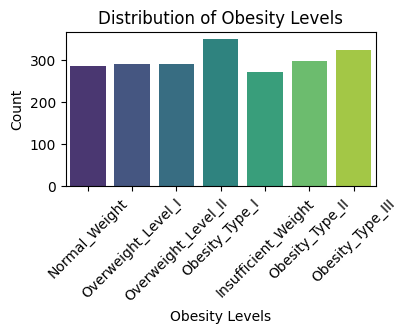

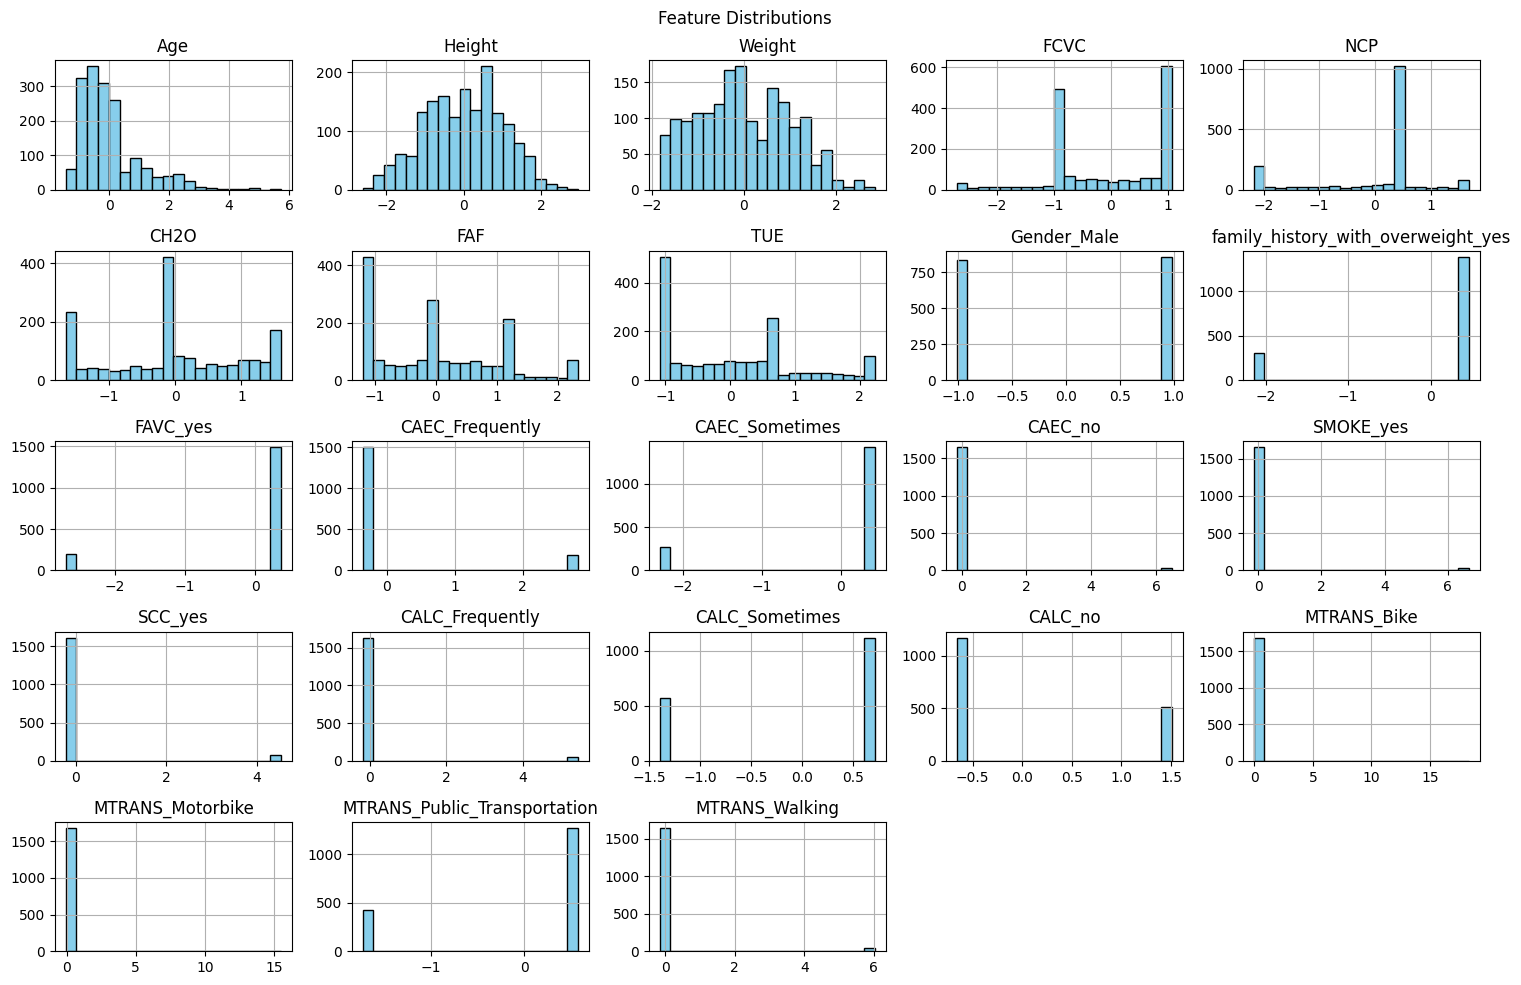

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 2))
sns.countplot(data=data, x='NObeyesdad', palette='viridis')
plt.title("Distribution of Obesity Levels")
plt.xlabel("Obesity Levels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


X_train_scaled_df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

CORRELATION MATRIX

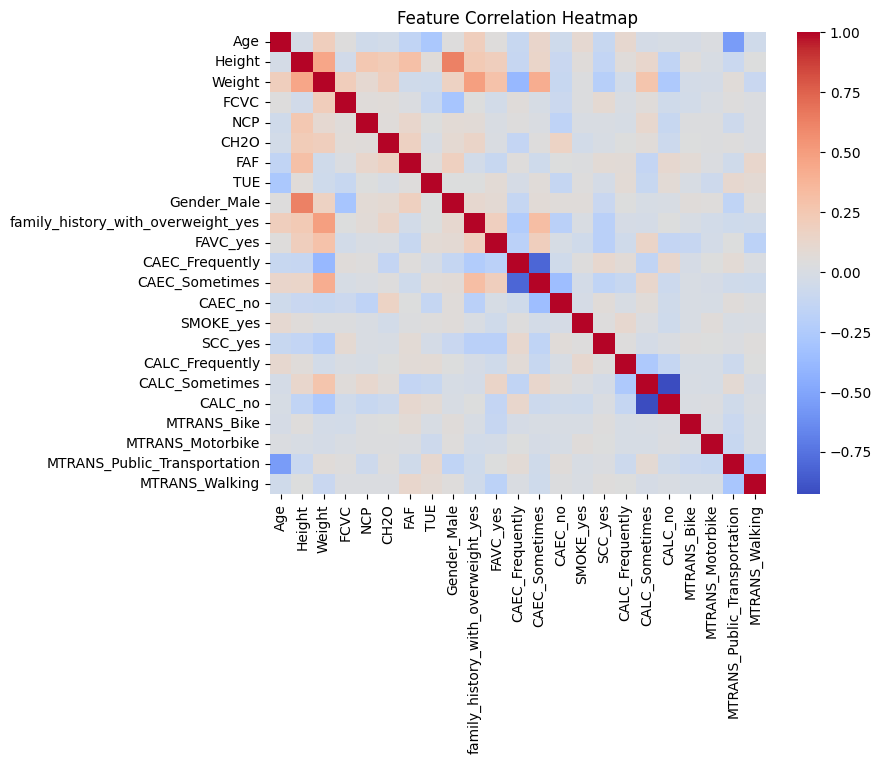

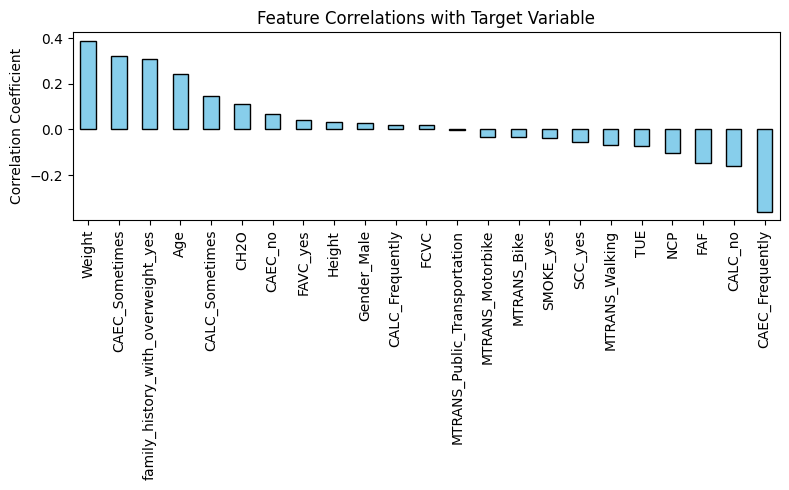

        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.830923  0.620541 -0.289869 -0.809585  0.402353  1.601927 -0.024257   
1 -0.361495  0.513995 -0.635417 -0.809585  0.402353  1.601927 -0.024257   
2 -0.987399 -0.018735 -1.199811  1.080202  0.402353 -0.029305  2.336114   
3 -0.751685  1.307219  0.042472  0.690076  1.419764  0.670590  1.267506   
4 -1.130536 -1.770158 -1.124592 -0.861469 -0.449641 -0.500610 -1.091715   

        TUE  Gender_Male  family_history_with_overweight_yes  ...   CAEC_no  \
0  2.242022     0.987051                            0.465849  ... -0.153788   
1  0.576454     0.987051                           -2.146619  ... -0.153788   
2 -1.089115     0.987051                            0.465849  ... -0.153788   
3 -0.433950     0.987051                            0.465849  ... -0.153788   
4  0.894666    -1.013119                           -2.146619  ... -0.153788   

   SMOKE_yes   SCC_yes  CALC_Frequently  CALC_Sometimes   CALC_no  \
0  -0

In [ ]:
#Use Pearson Correlation (default in most tools) to compute pairwise correlations between features.

# Compute correlation matrix
correlation_matrix = X_train_scaled_df.corr()

# Visualize the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Correlation with the target variable
X_train_scaled_df['Target'] = y_train  # Add target for correlation analysis
target_correlation = X_train_scaled_df.corr()['Target'].drop('Target')

# Visualize feature correlations with the target
plt.figure(figsize=(8, 5))
target_correlation.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Feature Correlations with Target Variable")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Remove the target column after analysis
X_train_scaled_df.drop(columns=['Target'], inplace=True)
print(X_train_scaled_df.head())

**TRAIN AND EVALUATE MODEL**

LOGISTIC REGRESSION METHOD

Logistic Regression Accuracy: 0.8652482269503546

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        54
           1       0.80      0.71      0.75        58
           2       0.86      0.91      0.89        70
           3       0.93      0.95      0.94        60
           4       1.00      0.98      0.99        65
           5       0.72      0.74      0.73        58
           6       0.81      0.74      0.77        58

    accuracy                           0.87       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.86      0.87      0.86       423



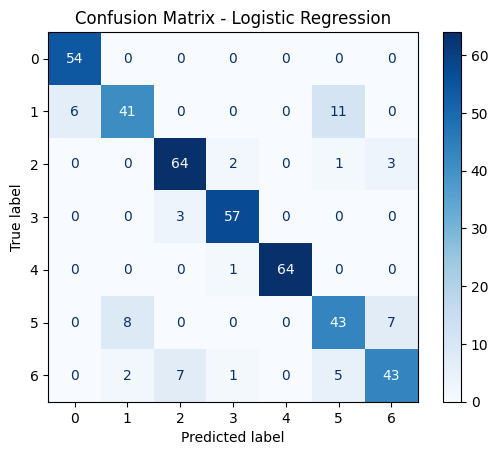

Probabilities:
 [[9.72373319e-01 2.68763708e-02 7.71154899e-10 ... 1.88424329e-10
  7.49566315e-04 7.43129359e-07]
 [5.62974797e-01 4.24685430e-01 5.97688343e-07 ... 2.13902325e-13
  1.18113320e-02 5.27842911e-04]
 [7.68906192e-05 1.67782885e-02 1.45438056e-01 ... 4.48108918e-05
  3.65831939e-01 4.70100392e-01]
 ...
 [1.66449585e-11 1.90083806e-06 6.57450719e-02 ... 1.75283659e-04
  6.99758717e-05 4.54996426e-03]
 [5.61907436e-01 4.24415150e-01 8.61788148e-07 ... 9.17558354e-13
  1.17729592e-02 1.90359173e-03]
 [3.27920055e-07 3.02693439e-04 9.29671090e-01 ... 2.82828247e-04
  1.22056471e-02 5.74372933e-02]]
Predicted Classes:
 [0 0 6 4 3 2 3 0 2 5 0 0 4 5 1 5 2 2 6 1 1 3 3 5 2 5 2 4 6 2 2 2 5 5 3 1 3
 0 4 0 5 0 4 4 6 4 0 6 3 5 4 0 5 2 6 1 4 4 4 3 6 6 0 6 5 2 2 0 3 2 4 6 0 0
 2 0 0 0 2 2 5 6 4 2 1 1 3 5 6 2 3 6 2 2 5 1 0 0 4 3 2 3 3 5 6 4 2 2 6 3 3
 1 4 3 4 4 0 4 1 1 4 6 4 0 2 3 1 6 5 3 4 2 0 0 0 5 3 2 3 0 4 3 3 2 2 3 2 2
 0 5 5 5 4 0 3 3 4 2 5 6 1 3 2 2 4 5 5 6 6 3 5 1 1 3 3 5 2 6 1 5

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
y_prob_logistic = logistic_model.predict_proba(X_test)
y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logistic))

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#Output results
print("Probabilities:\n", y_prob_logistic)
print("Predicted Classes:\n", y_pred_logistic)

RANDOM FOREST METHOD

Random Forest Accuracy: 0.9314420803782506

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.76      0.91      0.83        58
           2       0.94      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.89      0.83      0.86        58
           6       0.96      0.90      0.93        58

    accuracy                           0.93       423
   macro avg       0.94      0.93      0.93       423
weighted avg       0.94      0.93      0.93       423



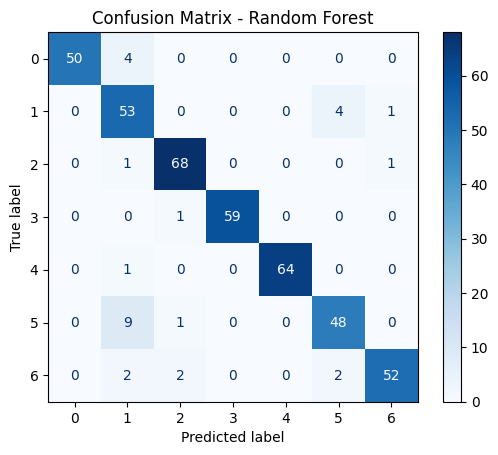

Probabilities:
 [[0.88 0.07 0.   ... 0.01 0.03 0.01]
 [0.1  0.77 0.03 ... 0.   0.1  0.  ]
 [0.   0.02 0.16 ... 0.   0.15 0.63]
 ...
 [0.01 0.01 0.09 ... 0.   0.03 0.02]
 [0.33 0.56 0.01 ... 0.   0.03 0.07]
 [0.   0.01 0.92 ... 0.   0.05 0.02]]
Predicted Classes:
 [0 1 6 4 3 2 3 1 2 5 0 1 4 5 1 5 2 2 6 1 1 3 3 5 6 5 2 4 6 2 3 2 5 5 1 1 3
 0 4 0 5 0 4 4 6 4 0 6 3 1 4 0 5 2 6 1 4 4 4 3 6 6 0 6 5 2 2 0 3 2 4 5 0 0
 2 0 0 0 2 2 1 6 4 2 1 1 3 5 6 6 3 6 2 3 5 1 0 1 4 3 2 3 3 5 6 4 2 2 6 3 6
 1 4 3 4 4 0 4 1 1 4 6 4 0 2 3 6 6 5 3 4 6 1 0 0 5 2 2 3 0 4 2 3 2 2 3 6 2
 0 5 5 5 4 0 3 3 4 2 5 6 1 3 2 2 4 6 5 6 6 3 5 1 1 3 3 5 2 5 1 5 2 3 2 3 0
 0 1 4 1 5 1 5 4 5 1 3 6 1 3 2 3 4 6 2 1 0 2 5 1 3 0 4 1 6 6 1 5 2 2 6 1 4
 2 2 1 5 3 4 3 5 6 0 2 4 6 6 5 0 3 2 4 1 4 2 5 5 1 0 2 3 6 1 4 2 3 4 2 4 6
 3 4 2 1 2 4 2 6 4 1 2 2 0 4 5 6 4 3 0 2 4 2 4 6 1 1 1 2 6 2 4 1 1 0 1 2 0
 5 5 6 1 6 5 1 0 1 6 2 1 4 4 4 1 4 6 6 4 1 4 2 5 0 4 1 2 6 3 5 3 0 4 6 4 2
 1 2 0 1 5 6 3 3 5 1 3 0 1 0 0 3 3 4 3 1 3 1 1 4 0 4 2 5 3 0 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_prob_rf = rf_model.predict_proba(X_test)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

#Output results
print("Probabilities:\n", y_prob_rf)
print("Predicted Classes:\n", y_pred_rf)

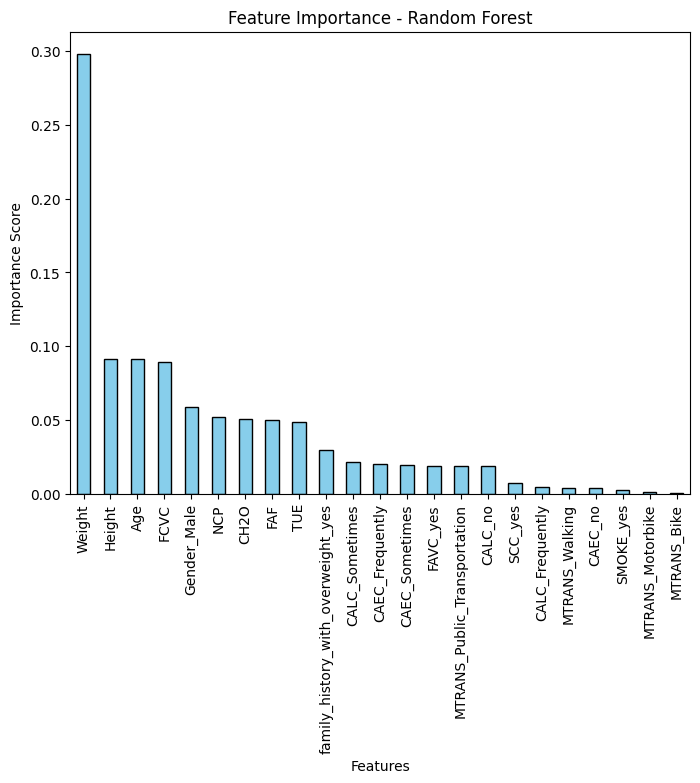

In [ ]:
#Feature Importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8, 6), color='skyblue', edgecolor='black')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()